# Introduction to SVMs

------------------------------------------------------
*Author: Nerea Luna Picón  -- NIA: 100330725*

------------------------------------------------------

**Objective**: using Support Vector Machine (supervised learning) to classify some input data.

In Section 1), we will use a fake dataset to observe the behaviour of this type of Machine Learning model, while in Section 2), we will use a real data set (Breast Cancer Diagnostic). In both cases, we will plot the models and analyze their error in the classification process.

In [18]:
# Importing required libraries
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Using seaborn library for plotting with default configuration
import seaborn as sns; sns.set()

## 1) Using a synthetic dataset

In this first part of the proyect, we will use a synthetic dataset

In [5]:
# We load the data and keep the train a test data separately
data=np.load('DataSet1.npz')

X_train=data['arr_0']
Y_train=data['arr_1']
X_test=data['arr_2']

In [7]:
# Shape (rows,columns) of the data set

print(X_train.shape) # (250, 2)
print(Y_train.shape) # (250, 1)
print(X_test.shape)  # (613, 2)

(250, 2)
(250, 1)
(613, 2)


Plotting the data to have a look at the two classes:

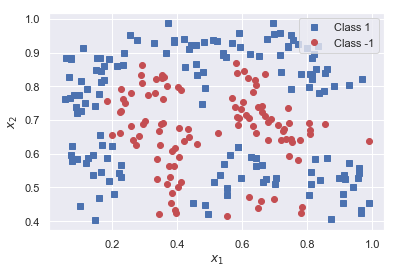

In [4]:
min1=np.min(X_train[:,0])
max1=np.max(X_train[:,0])
min2=np.min(X_train[:,1])
max2=np.max(X_train[:,1])


# Plotting the data
index=(Y_train==1).reshape(Y_train.shape[0],)
plt.plot(X_train[index,0],X_train[index,1],'s',label="Class 1")
index=(Y_train==0).reshape(Y_train.shape[0],)

plt.plot(X_train[index,0],X_train[index,1],'ro',label="Class -1")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.grid(True)
plt.legend()
plt.rcParams["figure.figsize"] = [8,8]

Holding out part of the training data to create a validation set. For instance, we take the 20% of the data points at random for validation:

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

# Splitting the training data into two partitions: the training itself and the validation one
X_train, X_val, y_train, y_val= train_test_split(data['arr_0'], data['arr_1'], 
                                                 test_size=0.2, random_state=42)

#print(y_train.shape)

We now train a SVM with different kernel types and see the results when plotting the boundary contour levels.
We will make use of different values of parameter $C$, which controls the trade-off between the number of training points and the margin. In each case, we will observe the evolution of the classification error rate for both training and validation sets.

### SVMs WITH LINEAR KERNELS ###

In [7]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC # "Support vector classifier"


# Creating models with different values of C
model = SVC(kernel='linear', C=1E10)
model2 = SVC(kernel='linear', C=10000000)
model3 = SVC(kernel='linear', C=10000)
model4 = SVC(kernel='linear', C=100)

# We train the models
model.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
# Method that plots the data as a function of the SVM model
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:           
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Creating a grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)    
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)                 
    
    # From the grid to a list of (x,y) values
    # ravel() flattens the data into 1-D array
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Plotting decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Plotting support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, marker='p')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

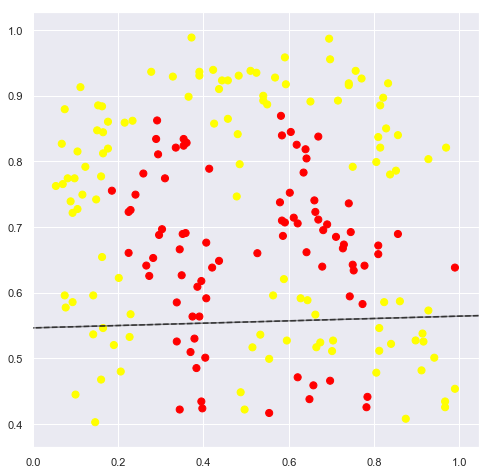

In [11]:
# Scatter plot of the training data for 1st model

# C = 1E10

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
            cmap='autumn')
plot_svc_decision_function(model,plot_support=False)

plt.rcParams["figure.figsize"] = [8,8]

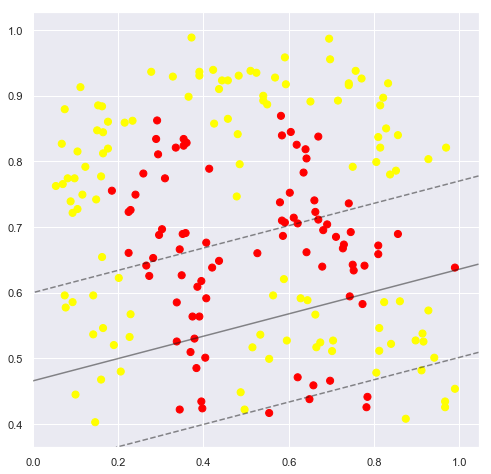

In [12]:
# C = 10000000

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
            cmap='autumn')
plot_svc_decision_function(model2,plot_support=False)


plt.rcParams["figure.figsize"] = [8,8]

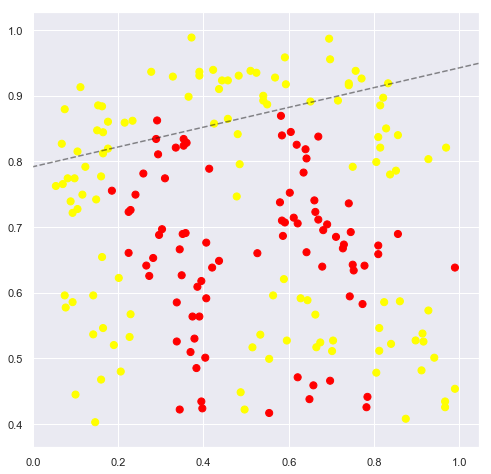

In [14]:
# C = 10000

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
            cmap='autumn')
plot_svc_decision_function(model3,plot_support=False)


plt.rcParams["figure.figsize"] = [8,8]

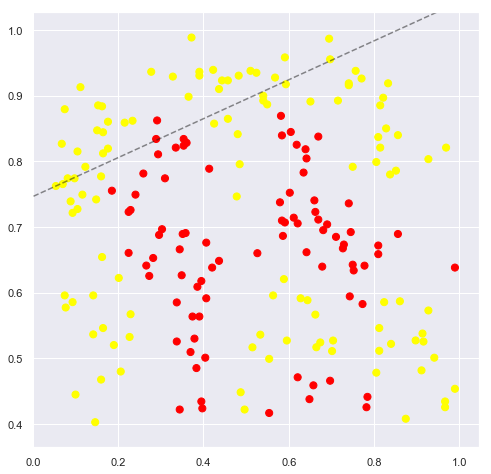

In [15]:
# C = 100

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
            cmap='autumn')
plot_svc_decision_function(model4,plot_support=False)


plt.rcParams["figure.figsize"] = [8,8]

In this case, whichever the selected value for C, we do not get reasonable results. We have tested different values of C and even though we have chosen a small value (C=100), we do not obtain an acceptable classifier. As a summary, using a linear kernel here will not provide good results.


Model 1 with  C = 1E10, the error rate for the training set is = 0.505
Model 1 with  C = 1E10, the error rate for the validation set is = 0.48
Model 2 with  C = 10000000, the error rate for the training set is = 0.505
Model 2 with  C = 10000000, the error rate for the validation set is = 0.48
Model 3 with  C = 10000, the error rate for the training set is = 0.425
Model 3 with  C = 10000, the error rate for the validation set is = 0.38
Model 4 with  C = 100, the error rate for the training set is = 0.425
Model 4 with  C = 100, the error rate for the validation set is = 0.38


Text(0, 0.5, 'Error rate')

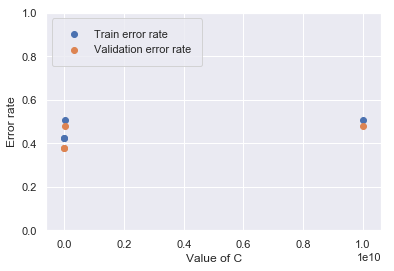

In [10]:
# Computing and plotting the classification error rate for both training and validation sets as a function of C

from sklearn.metrics import accuracy_score

# model, C = 1E10

y_train_pred = model.predict(X_train)
accuracy_t = accuracy_score(y_train, y_train_pred)
error_rate_t = 1 - accuracy_t
print("Model 1 with  C = 1E10, the error rate for the training set is =", 
      error_rate_t)

y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
error_rate = 1 - accuracy
print("Model 1 with  C = 1E10, the error rate for the validation set is =", 
      error_rate)

# model2, C = 10000000

y_train_pred2 = model2.predict(X_train)
accuracy_t2 = accuracy_score(y_train, y_train_pred2)
error_rate_t2 = 1 - accuracy_t2
print("Model 2 with  C = 10000000, the error rate for the training set is =", 
      error_rate_t2)

y_pred2 = model2.predict(X_val)
accuracy = accuracy_score(y_val, y_pred2)
error_rate2 = 1 - accuracy
print("Model 2 with  C = 10000000, the error rate for the validation set is =", 
      error_rate2)

# model3, C = 10000

y_train_pred3 = model3.predict(X_train)
accuracy_t3 = accuracy_score(y_train, y_train_pred3)
error_rate_t3 = 1 - accuracy_t3
print("Model 3 with  C = 10000, the error rate for the training set is =", 
      error_rate_t3)

y_pred3 = model3.predict(X_val)
accuracy = accuracy_score(y_val, y_pred3)
error_rate3 = 1 - accuracy
print("Model 3 with  C = 10000, the error rate for the validation set is =", 
      error_rate3)

# model4, C = 100

y_train_pred4 = model4.predict(X_train)
accuracy_t4 = accuracy_score(y_train, y_train_pred4)
error_rate_t4 = 1 - accuracy_t4
print("Model 4 with  C = 100, the error rate for the training set is =", 
      error_rate_t4)

y_pred4 = model4.predict(X_val)
accuracy = accuracy_score(y_val, y_pred4)
error_rate4 = 1 - accuracy
print("Model 4 with  C = 100, the error rate for the validation set is =", 
      error_rate4)


# Plots
%matplotlib inline
import matplotlib.pyplot as plt

n_parameters = [100,10000, 10000000, 1E10]
train_error = [0.425,0.425, 0.505, 0.505]
val_error = [0.38, 0.38, 0.48, 0.48]

#plt.xlim(9990, 1E11)
plt.ylim(0, 1)

plt.scatter(n_parameters, train_error,label='Train error rate')
plt.scatter(n_parameters, val_error,label='Validation error rate')

plt.legend(loc='upper left', borderpad=1)
plt.xlabel('Value of C')
plt.ylabel('Error rate')

From the plots and the figure above, it has been checked that using a linear kernel is not the most adequate approach, results when classifying are very bad. 

### SVMs WITH RBF (Radial Basis Function) KERNELS ###

We now train a SVM with a RBF kernel instead, plotting the boundary contour levels. 

We will use different values of $C$ and $\gamma$ (bandwidth) and analyze the evolution of the number of support vectors as we vary these quantities.

We will compute and plot the classification error rate for both training and validation sets as a function of $C$.


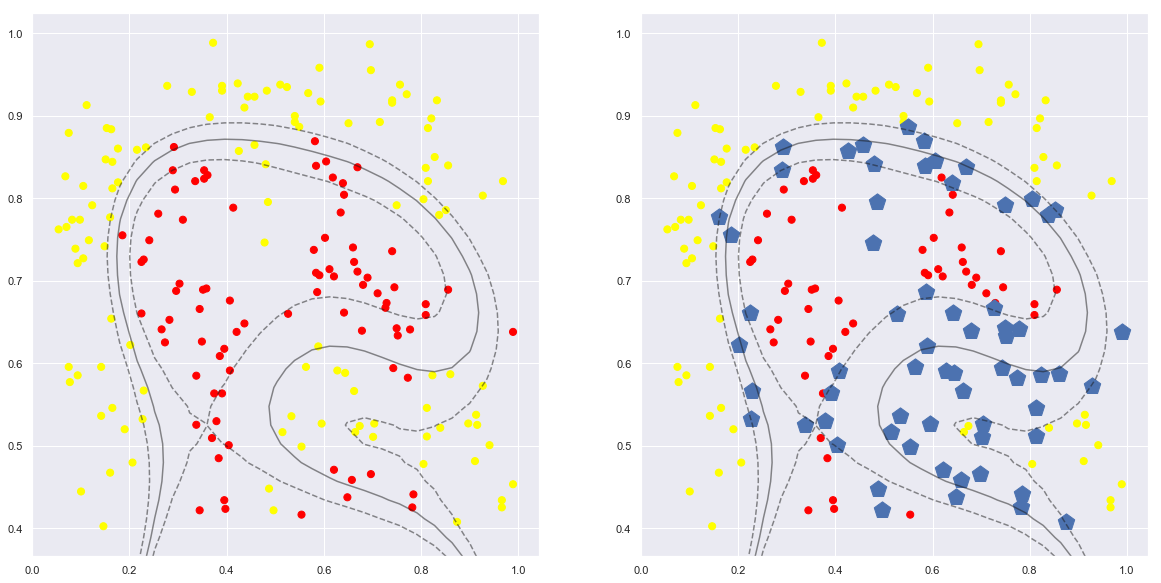

In [12]:
import warnings
warnings.filterwarnings('ignore')

# Training a SVM with a RBF kernel with bandwith γ
# γ defines how far the influence of a single training example reaches,
# with low values meaning ‘far’ and high values meaning ‘close’.)
model_rbf = SVC(kernel='rbf',C=1e6).fit(X_train, y_train)

# Plotting the decision boundary
f, axes = plt.subplots(1, 2)
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
                cmap='autumn')
plot_svc_decision_function(model_rbf ,ax=axes[0], plot_support=False) 
axes[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
                cmap='autumn')
plot_svc_decision_function(model_rbf ,ax=axes[1], plot_support=True) 


plt.rcParams["figure.figsize"] = [20,10]

### Fixing $\gamma$ and varying C

In [13]:
import warnings
warnings.filterwarnings('ignore')

# fix  γ=1  and vary  C

model1_rbf = SVC(kernel='rbf',C=1e8,gamma=1).fit(X_train, y_train)
model2_rbf = SVC(kernel='rbf',C=1e6,gamma=1).fit(X_train, y_train)
model3_rbf = SVC(kernel='rbf',C=1e4,gamma=1).fit(X_train, y_train)
model4_rbf = SVC(kernel='rbf',C=1e2,gamma=1).fit(X_train, y_train)

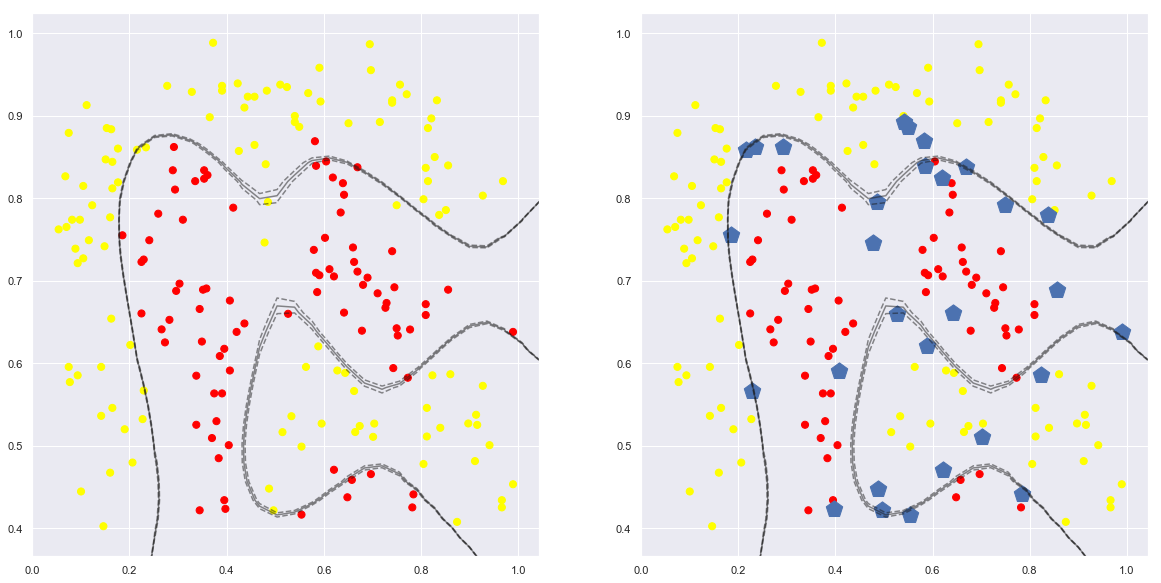

In [22]:
# C=1e8,gamma=1

f, axes = plt.subplots(1, 2)
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
                cmap='autumn')
plot_svc_decision_function(model1_rbf ,ax=axes[0], plot_support=False) 
axes[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
                cmap='autumn')
plot_svc_decision_function(model1_rbf ,ax=axes[1], plot_support=True) 


plt.rcParams["figure.figsize"] = [20,10]

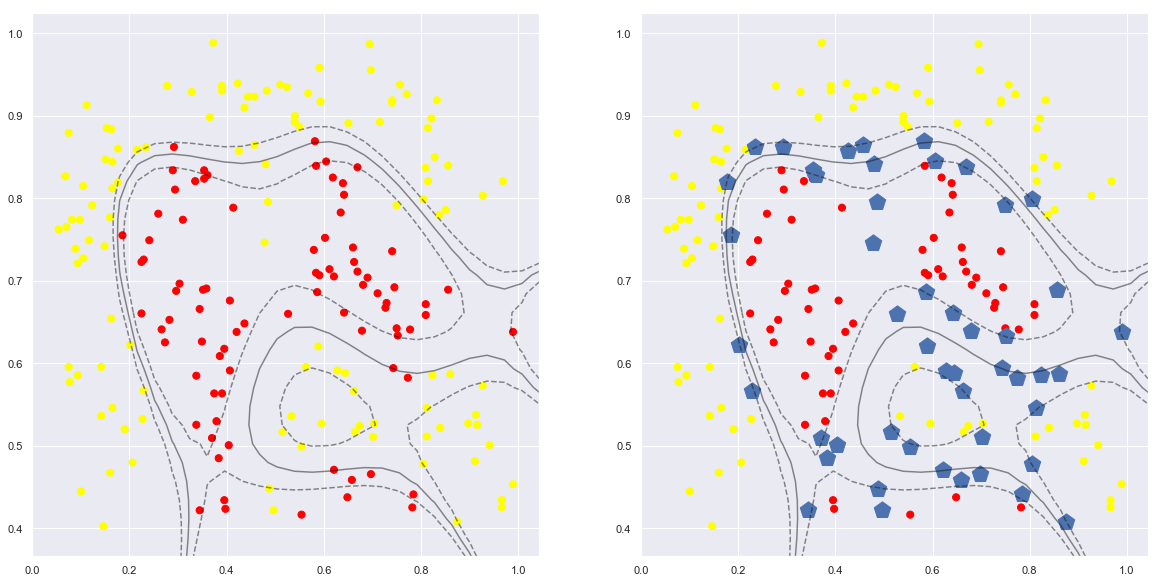

In [23]:
# C=1e6,gamma=1

f, axes = plt.subplots(1, 2)
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
                cmap='autumn')
plot_svc_decision_function(model2_rbf ,ax=axes[0], plot_support=False) 
axes[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
                cmap='autumn')
plot_svc_decision_function(model2_rbf ,ax=axes[1], plot_support=True) 


plt.rcParams["figure.figsize"] = [20,10]

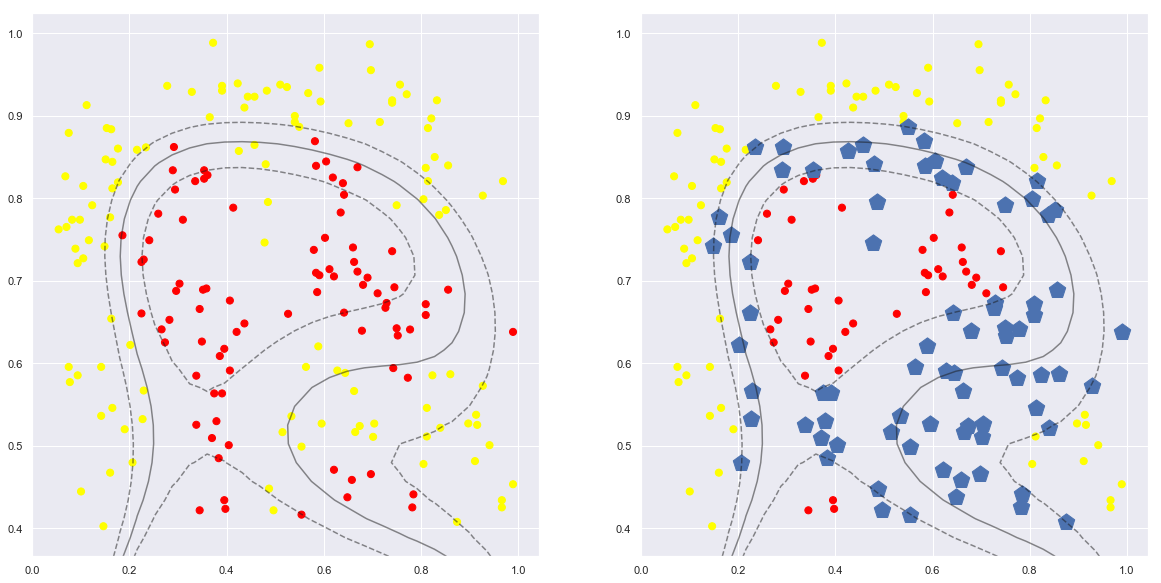

In [24]:
# C=1e4,gamma=1

f, axes = plt.subplots(1, 2)
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
                cmap='autumn')
plot_svc_decision_function(model3_rbf ,ax=axes[0], plot_support=False) 
axes[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
                cmap='autumn')
plot_svc_decision_function(model3_rbf ,ax=axes[1], plot_support=True) 


plt.rcParams["figure.figsize"] = [20,10]

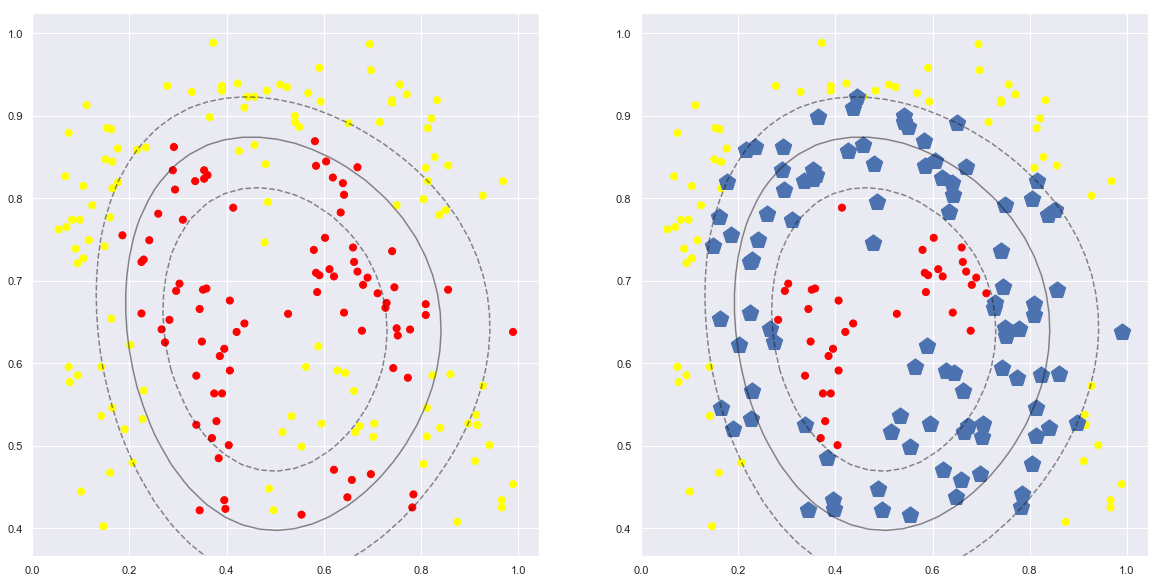

In [25]:
# C=1e2,gamma=1

f, axes = plt.subplots(1, 2)
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
                cmap='autumn')
plot_svc_decision_function(model4_rbf ,ax=axes[0], plot_support=False) 
axes[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
                cmap='autumn')
plot_svc_decision_function(model4_rbf ,ax=axes[1], plot_support=True) 


plt.rcParams["figure.figsize"] = [20,10]

As we have observed in the RBF plots above, by decreasing the value of C we progressively get a more generalized SVM classifier, which will also tend to avoid overfitting. In the first cases, we can see how the hyperplane perfectly fits the training data, so this is not good when new data is coming (overfitting). However, the last attemp (C=100) shows a more general boundary to classify new data points, so this value will be the one set in the subsequent cells when varying $\gamma$ instead.

### Fixing C and varying $\gamma$

In [14]:
import warnings
warnings.filterwarnings('ignore')

# fix C=1e2 and vary γ

# gamma= 'auto'  ==> gamma = 1/ n_features = 0.5

model5_rbf = SVC(kernel='rbf',C=1e2,gamma='auto').fit(X_train, y_train) 
model6_rbf = SVC(kernel='rbf',C=1e2,gamma=1).fit(X_train, y_train)
model7_rbf = SVC(kernel='rbf',C=1e2,gamma=5).fit(X_train, y_train)
model8_rbf = SVC(kernel='rbf',C=1e2,gamma=7).fit(X_train, y_train)

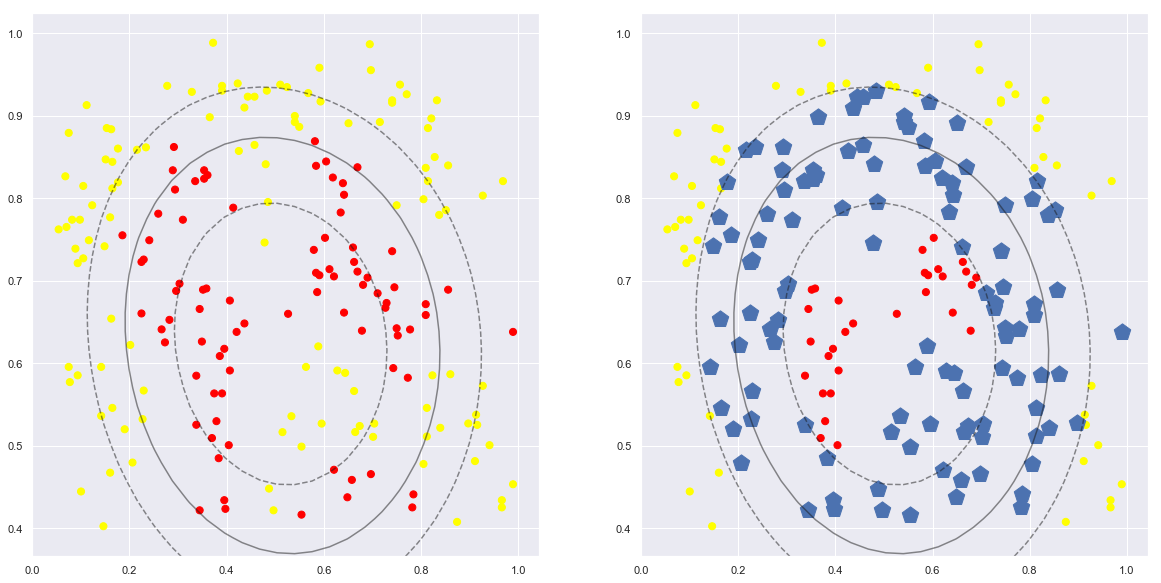

In [34]:
# C=1e2, gamma=auto (gamma = 0.5)

f, axes = plt.subplots(1, 2)
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
                cmap='autumn')
plot_svc_decision_function(model5_rbf ,ax=axes[0], plot_support=False) 
axes[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
                cmap='autumn')
plot_svc_decision_function(model5_rbf ,ax=axes[1], plot_support=True) 


plt.rcParams["figure.figsize"] = [20,10]

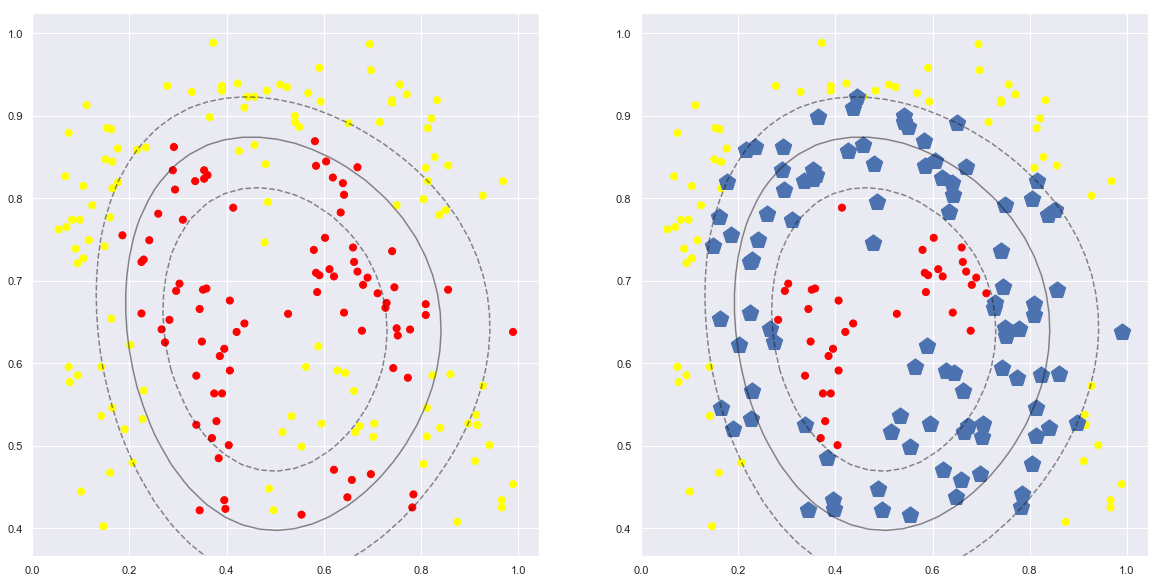

In [28]:
# C=1e2, gamma=1

f, axes = plt.subplots(1, 2)
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
                cmap='autumn')
plot_svc_decision_function(model6_rbf ,ax=axes[0], plot_support=False) 
axes[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
                cmap='autumn')
plot_svc_decision_function(model6_rbf ,ax=axes[1], plot_support=True) 


plt.rcParams["figure.figsize"] = [20,10]

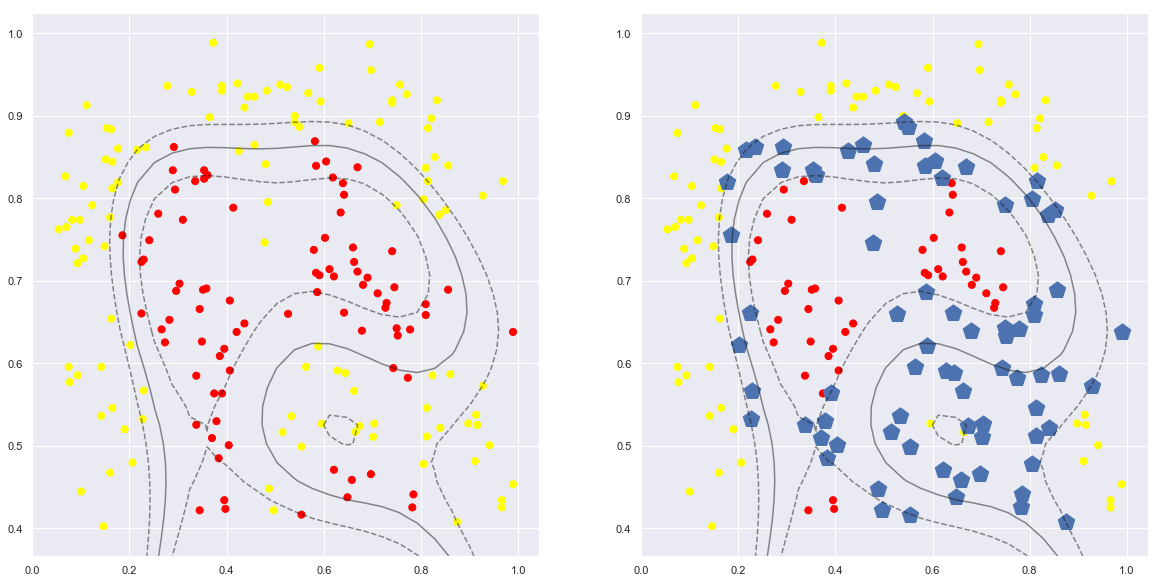

In [29]:
# C=1e2, gamma=5

f, axes = plt.subplots(1, 2)
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
                cmap='autumn')
plot_svc_decision_function(model7_rbf ,ax=axes[0], plot_support=False) 
axes[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
                cmap='autumn')
plot_svc_decision_function(model7_rbf ,ax=axes[1], plot_support=True) 


plt.rcParams["figure.figsize"] = [20,10]

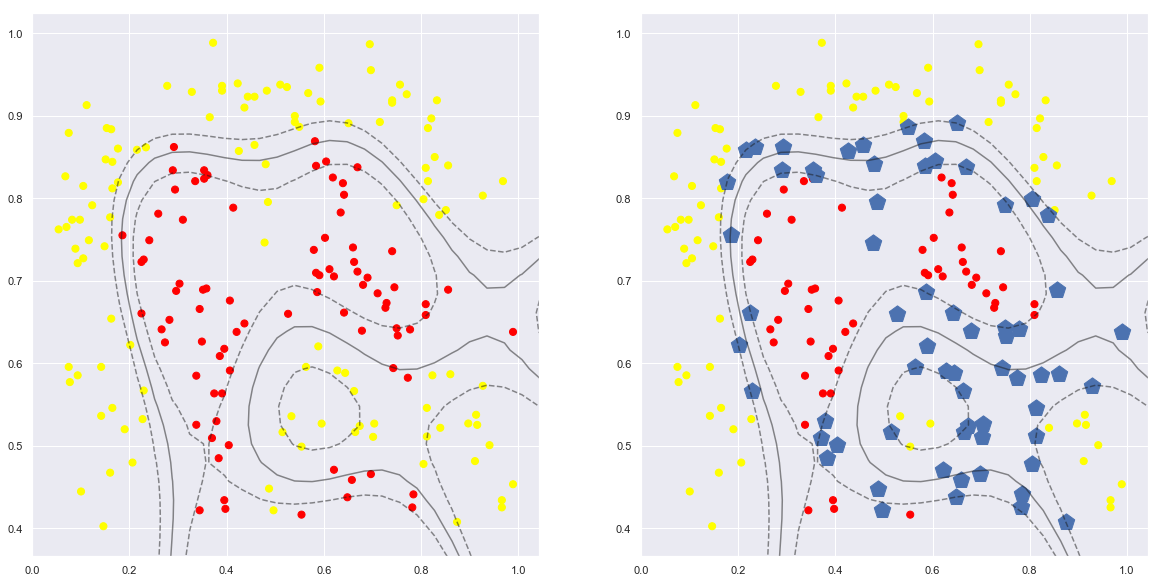

In [30]:
# C=1e2, gamma=7

f, axes = plt.subplots(1, 2)
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
                cmap='autumn')
plot_svc_decision_function(model8_rbf ,ax=axes[0], plot_support=False) 
axes[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape(-1,), s=50,
                cmap='autumn')
plot_svc_decision_function(model8_rbf ,ax=axes[1], plot_support=True) 


plt.rcParams["figure.figsize"] = [20,10]

In this case we are playing with different gamma values, from smaller to larger ones. It seems that with small values we get a more general SVM classifier, but whenever we increase gamma, the model overfits.

Model 5 with  γ = 0.5, the error rate for the training set is = 0.17
Model 5 with  γ = 0.5, the error rate for the validation set is = 0.16
Model 6 with  γ = 1, the error rate for the training set is = 0.16
Model 6 with  γ = 1, the error rate for the validation set is = 0.14
Model 7 with  γ = 5, the error rate for the training set is = 0.09
Model 7 with  γ = 5, the error rate for the validation set is = 0.08
Model 8 with  γ = 7, the error rate for the training set is = 0.05
Model 8 with  γ = 7, the error rate for the validation set is = 0.08


Text(0, 0.5, 'Error rate')

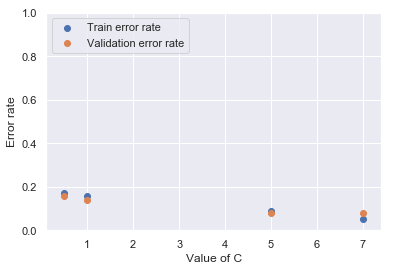

In [35]:
# We now compute and plot the classification error rate for both training and validation sets as a function of C,
# as we did with the linear kernels

from sklearn.metrics import accuracy_score

# model5_rbf, γ = 0.5, C = 100

y_train_pred = model5_rbf.predict(X_train)
accuracy_t = accuracy_score(y_train, y_train_pred)
error_rate_t = 1 - accuracy_t
print("Model 5 with  γ = 0.5, the error rate for the training set is =", 
      error_rate_t)

y_pred = model5_rbf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
error_rate = 1 - accuracy
print("Model 5 with  γ = 0.5, the error rate for the validation set is =", 
      error_rate)

# model6_rbf, γ = 1, C = 100

y_train_pred2 = model6_rbf.predict(X_train)
accuracy_t2 = accuracy_score(y_train, y_train_pred2)
error_rate_t2 = 1 - accuracy_t2
print("Model 6 with  γ = 1, the error rate for the training set is =",
      error_rate_t2)

y_pred2 = model6_rbf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred2)
error_rate2 = 1 - accuracy
print("Model 6 with  γ = 1, the error rate for the validation set is =",
      error_rate2)

# model7_rbf, γ = 5, C = 100

y_train_pred3 = model7_rbf.predict(X_train)
accuracy_t3 = accuracy_score(y_train, y_train_pred3)
error_rate_t3 = 1 - accuracy_t3
print("Model 7 with  γ = 5, the error rate for the training set is =",
      error_rate_t3)

y_pred3 = model7_rbf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred3)
error_rate3 = 1 - accuracy
print("Model 7 with  γ = 5, the error rate for the validation set is =",
      error_rate3)

# model8_rbf, γ = 7, C = 100

y_train_pred4 = model8_rbf.predict(X_train)
accuracy_t4 = accuracy_score(y_train, y_train_pred4)
error_rate_t4 = 1 - accuracy_t4
print("Model 8 with  γ = 7, the error rate for the training set is =",
      error_rate_t4)

y_pred4 = model8_rbf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred4)
error_rate4 = 1 - accuracy
print("Model 8 with  γ = 7, the error rate for the validation set is =",
      error_rate4)

# Plot

%matplotlib inline
import matplotlib.pyplot as plt

n_parameters = [0.5, 1, 5, 7]
train_error = [0.17, 0.16, 0.089, 0.05]
val_error = [0.16, 0.14, 0.079, 0.079]

#plt.xlim(9990, 1E11)
plt.ylim(0, 1)
plt.scatter(n_parameters, train_error,label='Train error rate')
plt.scatter(n_parameters, val_error,label='Validation error rate')
plt.legend(loc='upper left')
plt.xlabel('Value of C')
plt.ylabel('Error rate')

As observed above in the error graph, we have improved the error rate in both training and validation partitions. As a general conclusion, the RBF kernel does better than the linear one.

## 2) Using a real dataset: Breast Cancer Diagnostic Data Set


The [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) contains 10 features related to breast tumors that have been diagnosed as benign or malignant.

We will now apply the SVMs over a real data set.

In [12]:
# Reading the csv file and cleaning the data because there are some missing values 

import pandas as pd 

# 2: Benign breast tumor
# 4: Malignant breast tumor

# We recodified those values to 0 and 1. Therefore:
# 0: Benign breast tumor
# 1: Malignant breast tumor

data = pd.read_csv('breast-cancer-wisconsin.csv', header=None, delimiter=';',
                   na_values=['?'])    # Take any '?' value as NA
#data.head()
#data.shape # (698, 11)
dataclean = data.dropna()
dataclean.head()
# dataclean.shape # (683, 11)

df = pd.DataFrame(dataclean) 
y=df.iloc[:, 10] # keep all the rows and the last column
X=df.iloc[:, 1:10] # keep all the rows and all columns but the last one

# We show the first rows of our dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [13]:
# We hold out part of the training data to create a test set (20% of the data points will correspond to the test set)

import numpy as np
from sklearn.model_selection import train_test_split

#  Spliting the data into train and test sets

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,
                                                   random_state=42) 

# Spliting the training data into train and validation sets

X_train, X_val, y_train, y_val= train_test_split(X_train, y_train,
                                                 test_size=0.2,
                                                 random_state=42) 

X_test.head()

,1,2,3,4,5,6,7,8,9
304,8,3,4,9,3,10.0,3,3,1
149,8,8,7,4,10,10.0,7,8,7
217,1,1,1,1,2,1.0,3,1,1
120,1,1,2,2,2,1.0,3,1,1
314,1,1,1,1,1,1.0,2,1,1


In [14]:
import warnings
warnings.filterwarnings('ignore')


from sklearn import preprocessing

# We normalize the data so every feature has zero mean and unit variance.
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

meantrain = X_train.mean(axis=0) 
# (4.4013, 3.1376, 3.2293, 2.8050, 3.2133, 3.3967, 3.3509, 2.7706, 1.6009)
stdtrain = X_train.std(axis=0)   
# (2.7943, 3.1027, 3.0876, 2.8204, 2.2351, 3.6040, 2.4122, 2.9877, 1.6982)

X_train = preprocessing.scale(X_train)
#X_train.shape # (436, 9)
#X_train.mean(axis=0) # mean = 1
#X_train.std(axis=0)  # standard deviation = 0 

X_val = (X_val - meantrain)/stdtrain
#X_val.head()

X_test = (X_test - meantrain)/stdtrain
#X_test.head()

Now, we use the validation set to compare the classification error for different SVM models and chose the best hyperparameters ($C$ and kernel parameters), which are chosen using [5-fold cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html):

In [16]:
from __future__ import print_function

import warnings
warnings.filterwarnings('ignore')

# Source: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

################################################



from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Set the parameters by cross-validation

# Trying different kernels and values of C and γ  
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],  
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision']

for score in scores:
    print("# Tuning hyper-parameters for %s"'\n' % score)
    
    # GridSearch is a hypertuning technique that explores all possible combinations of the parameters to be tested. 
    # Hence, it will train the model with all different values of the parameters set above in 'tuned_parameters' variable
    clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on training set:"'\n')
    print(clf.best_params_)
    print()
    print("Grid scores on training set:"'\n')

    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:"'\n')
    print("The model is trained on the training set.")
    print("The scores are computed on the validation set."'\n')

    y_true, y_pred = y_val, clf.predict(X_val)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on training set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on training set:

0.969 (+/-0.024) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.338 (+/-0.003) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.973 (+/-0.026) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.969 (+/-0.024) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.971 (+/-0.024) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.973 (+/-0.026) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.971 (+/-0.027) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.971 (+/-0.024) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.971 (+/-0.027) for {'C': 1, 'kernel': 'linear'}
0.973 (+/-0.035) for {'C': 10, 'kernel': 'linear'}
0.973 (+/-0.035) for {'C': 100, 'kernel': 'linear'}
0.973 (+/-0.035) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the training set.
The scores are computed on the validati

According to those results, the models with best parameters are:

        -> 0.973 (+/-0.026) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
        -> 0.973 (+/-0.026) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
        -> 0.973 (+/-0.035) for {'C': 10, 'kernel': 'linear'}
        -> 0.973 (+/-0.035) for {'C': 100, 'kernel': 'linear'}
        -> 0.973 (+/-0.035) for {'C': 1000, 'kernel': 'linear'}

These five will be evaluated below with the test set and extract some concluding remarks:

In [17]:
# Now, using the test set, we compare the classification error for the different SVM models

# We compute and plot the classification error rate for both training and validation sets as a function of C

from sklearn.metrics import accuracy_score

# Testing over a set of linear kernels
model10 = SVC(kernel='linear', C=10).fit(X_train, y_train)
model11 = SVC(kernel='linear', C=100).fit(X_train, y_train)
model12 = SVC(kernel='linear', C=1000).fit(X_train, y_train)

# Testing over a set of RBF kernels
model13_rbf = SVC(kernel='rbf',C=10,gamma=0.001).fit(X_train, y_train)
model14_rbf = SVC(kernel='rbf',C=100,gamma=0.0001).fit(X_train, y_train)


# model10

y_test_pred = model10.predict(X_test)
accuracy_t = accuracy_score(y_test, y_test_pred)
error_rate_t = 1 - accuracy_t
print("Linear kernel with  C = 10, the error rate for the test set is =", 
      error_rate_t)


# model11

y_test_pred = model11.predict(X_test)
accuracy_t = accuracy_score(y_test, y_test_pred)
error_rate_t = 1 - accuracy_t
print("Linear kernel with  C = 100, the error rate for the test set is =", 
      error_rate_t)


# model12

y_test_pred = model12.predict(X_test)
accuracy_t = accuracy_score(y_test, y_test_pred)
error_rate_t = 1 - accuracy_t
print("Linear kernel with  C = 1000, the error rate for the test set is =", 
      error_rate_t)

# model13_rbf

y_test_pred = model13_rbf.predict(X_test)
accuracy_t = accuracy_score(y_test, y_test_pred)
error_rate_t = 1 - accuracy_t
print("rbf kernel with  C = 10 and gamma=0.001 the error rate for the test set is =", 
      error_rate_t)

# model14_rbf

y_test_pred = model14_rbf.predict(X_test)
accuracy_t = accuracy_score(y_test, y_test_pred)
error_rate_t = 1 - accuracy_t
print("rbf kernel with  C = 100 and gamma=0.0001 the error rate for the test set is =",
      error_rate_t)


Linear kernel with  C = 10, the error rate for the test set is = 0.051094890510948954
Linear kernel with  C = 100, the error rate for the test set is = 0.051094890510948954
Linear kernel with  C = 1000, the error rate for the test set is = 0.051094890510948954
rbf kernel with  C = 10 and gamma=0.001 the error rate for the test set is = 0.029197080291970767
rbf kernel with  C = 100 and gamma=0.0001 the error rate for the test set is = 0.029197080291970767


Explanation of the results:

Once evaluating the best SVM models, we can compare their classification error. At first glance, we can observe that we get two different error values, ~0.051 when referring to one linear kernel model, or ~0.029 for the RBF kernel. Thus, we can not differentiate within each kernel type which is the best model (although the value of the parameters change from one model to other).

However, if comparing between the two kernel types, we can see that the RBF models return a smaller error (0.029 instead of 0.051), so we would keep one of these SVM models. Moreover, if we take a look at the parameters of these RBF kernels, we see that model *model14_rbf* uses a higher C parameter. This maybe will tend the model to overfit at some point in time, but this assumption would need to be examined in detail.

After applying *GridSearch* for tuning the parameters of the model, the best combination was *{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}*, so as these values are associated with our *model13_rbf*, this will be the best model for to classify breast tumors. 